In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
submission_df = pd.read_csv("../submissions/submission-1.06.csv");

In [3]:
test_df = pd.read_csv("../data/raw/test.csv")

In [4]:
train_df = pd.read_csv("../data/raw/train.csv")

In [5]:
test_df = test_df.merge(submission_df, on="row_id")

In [6]:
test_df.drop(columns="row_id", inplace=True)

In [7]:
test_df.head()

building_id  meter            timestamp  meter_reading
0            0      0  2017-01-01 00:00:00     168.170537
1            1      0  2017-01-01 00:00:00      60.459634
2            2      0  2017-01-01 00:00:00       6.317182
3            3      0  2017-01-01 00:00:00     233.037190
4            4      0  2017-01-01 00:00:00    1094.490301

In [8]:
test_df.tail()

building_id  meter            timestamp  meter_reading
41697595         1444      0  2018-05-09 07:00:00       5.846339
41697596         1445      0  2018-05-09 07:00:00       3.844796
41697597         1446      0  2018-05-09 07:00:00       6.935650
41697598         1447      0  2018-05-09 07:00:00     153.462742
41697599         1448      0  2018-05-09 07:00:00       3.531959

In [9]:
df = test_df.append(train_df, ignore_index=True)

In [10]:
train_df.sort_values(by=["building_id", "meter", "timestamp"], inplace=True)
test_df.sort_values(by=["building_id", "meter", "timestamp"], inplace=True)
df.sort_values(by=["building_id", "meter", "timestamp"], inplace=True)

In [11]:
meter_names = {0: "electricity", 1: "chilledwater", 2: "steam", 3: "hotwater"}

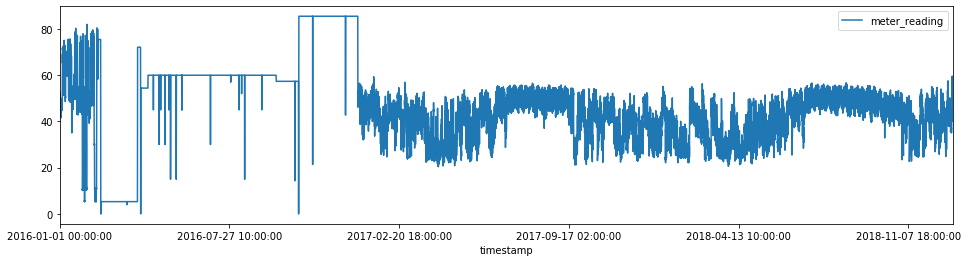

In [12]:
df.loc[(df["building_id"] == 218) & (df["meter"] == 0)].plot(x="timestamp", y="meter_reading", figsize=(16,4))

In [13]:
def plot_building_list(l):
    count = len(l)
    fig = plt.figure(figsize=(16, 4 * count))
    for i, (b, m) in enumerate(l):
        train_part_df = train_df.loc[(train_df["building_id"] == (b)) & (train_df["meter"] == m)]
        test_part_df = test_df.loc[(test_df["building_id"] == (b)) & (test_df["meter"] == m)]
        
        ax = fig.add_subplot(count, 1, i + 1)
        ax.plot(train_part_df.groupby("timestamp")["meter_reading"].first(), label="training data")
        ax.plot(test_part_df.groupby("timestamp")["meter_reading"].first(), label="prediction")
        
        ax.set_title("Building " + str(b) + " " + meter_names[m])
        ax.legend()

        part_df = train_part_df.append(test_part_df, ignore_index=True)
        part_df.reset_index(drop=True, inplace=True)
        xtick_values = ["2016-01-01 00:00:00", "2017-01-01 00:00:00", "2018-01-01 00:00:00", "2018-12-31 23:00:00"]
        ax.set_xticks(part_df["timestamp"][part_df["timestamp"].isin(xtick_values)].index)
        fig.canvas.draw()
        ax.set_xticklabels(["2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01"])

    fig.tight_layout()
    #fig.savefig("../reports/figures/readings.svg", format="svg")

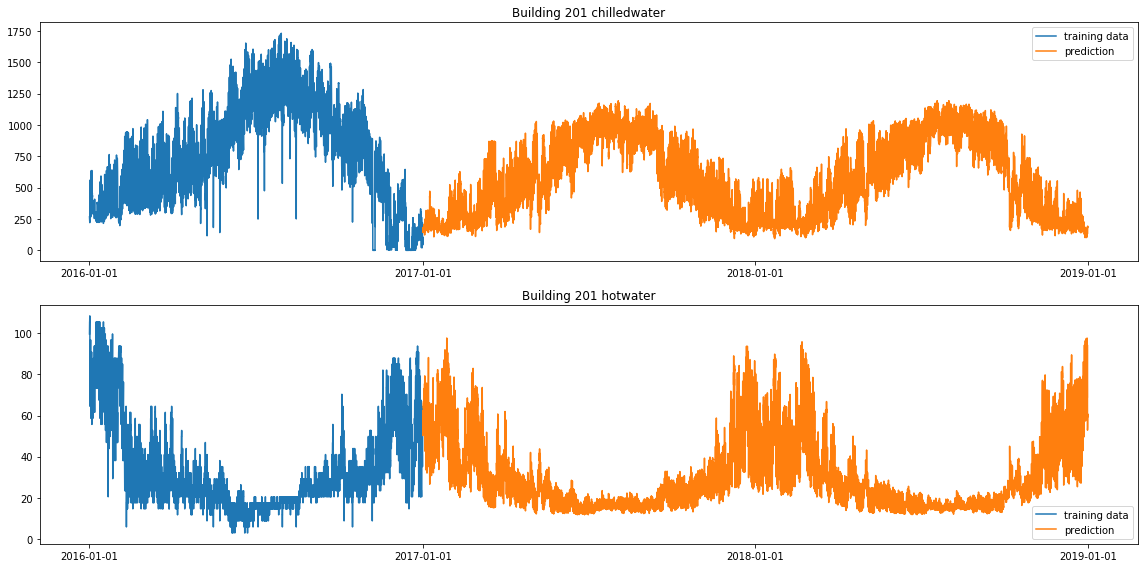

In [14]:
plot_building_list([
    (201, 1),
    (201, 3),
])

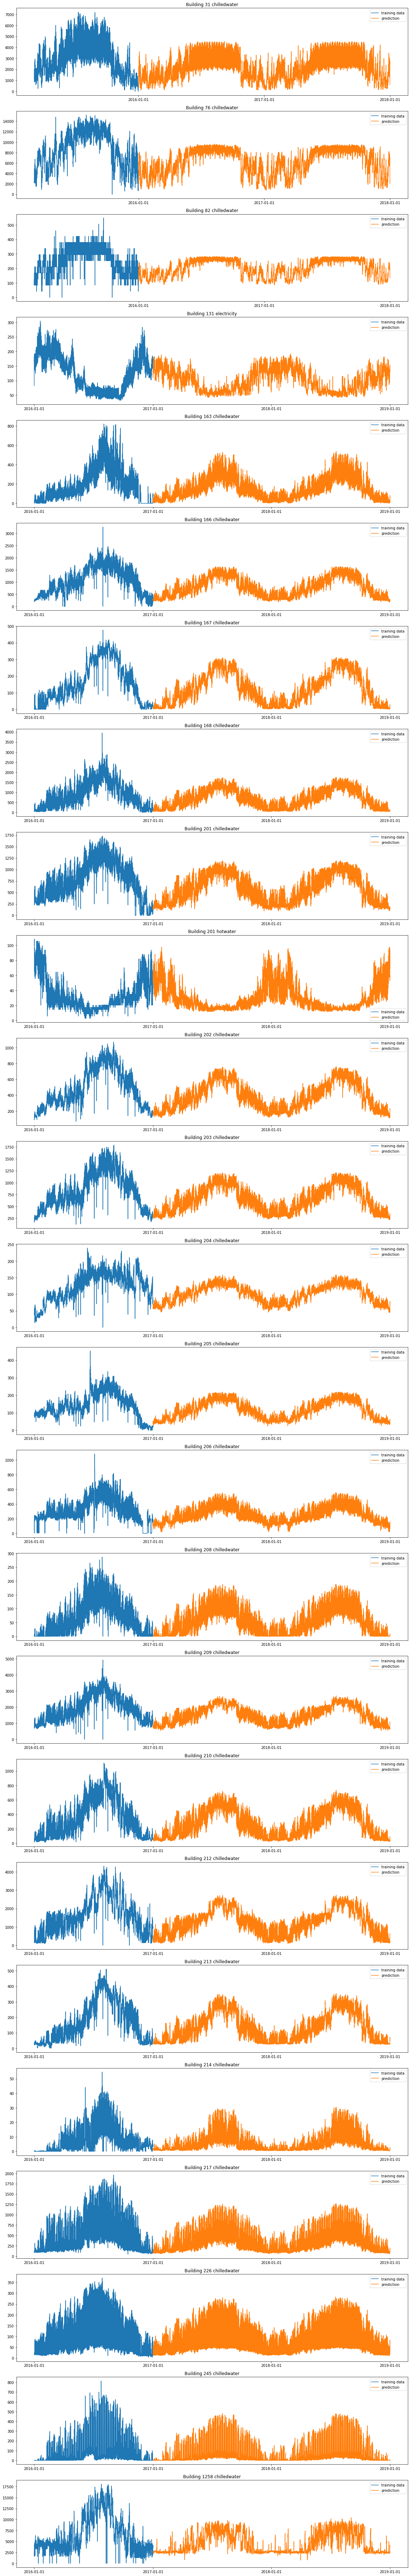

In [15]:
plot_building_list([
(31, 1),
(76, 1),
(82, 1),
(131, 0),
(163, 1),
(166, 1),
(167, 1),
(168, 1),
(201, 1),
(201, 3),
(202, 1),
(203, 1),
(204, 1),
(205, 1),
(206, 1),
(208, 1),
(209, 1),
(210, 1),
(212, 1),
(213, 1),
(214, 1),
(217, 1),
(226, 1),
(245, 1),
(1258, 1),
])

In [16]:
def plot_buildings(building_offset, building_count):
    meter_count = 4
    count = building_count * meter_count
    fig = plt.figure(figsize=(16, 4 * count))
    counter = 0
    for b in range(building_count):
        for m in range(meter_count):
            part_df = df.loc[(df["building_id"] == (b + building_offset)) & (df["meter"] == m)]
            if len(part_df):
                counter = counter + 1
                #ax = fig.add_subplot(count, 1, b * meter_count + m + 1)
                ax = fig.add_subplot(count, 1, counter)
                ax.set_title("Building " + str(b + building_offset) + " " + meter_names[m])
                part_df.plot(x="timestamp", y="meter_reading", ax=ax)

    plt.tight_layout()

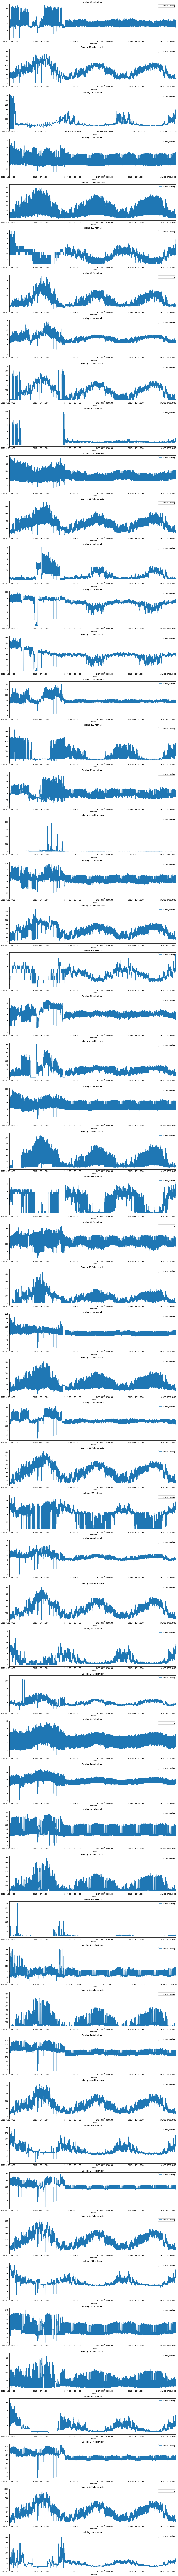

In [17]:
plot_buildings(225, 25)